$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

# Data:

For this exercises I will using the dataset dadesDelayedFlights_Mod.csv, that is the cleaned version of the file dadesDelayedFlights.csv that we had done in Sprint 2 task 5.

We load the file:

In [2]:
df = pd.read_csv('DelayedFlights_Mod.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed,TaxiTime
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,8.0,0.0,0.0,0.0,0.0,0.0,379.687500,0,0.0,12.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,10.0,0.0,0.0,0.0,0.0,0.0,379.687500,1,0.0,15.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,17.0,0.0,0.0,0.0,0.0,0.0,321.875000,1,0.0,20.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,10.0,2.0,0.0,0.0,0.0,32.0,343.333333,1,34.0,13.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,10.0,0.0,0.0,0.0,0.0,0.0,408.712871,1,0.0,14.0


In [5]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'VelocityAir', 'DelayedArr', 'TotalDelayed',
       'TaxiTime'],
      dtype='object')

Columns and their meaning:
- **Month** , **DayofMonth**, **DayOfWeek**: Each column is the date of the flight. In format: MM/DD and Monday to Sunday in numbers.
- **DepTime**: Time the plane departed from the origin airport. Format: HHMM.
- **CRSDepTime**: Time the plane was schedule to depart from the airport (CRS is the central computer system, also this is the time that appears on the panels around the airport for the public to see their flights). Format: HHMM.
- **ArrTime**: Time that the plane arrived to the destination airport. Format: HHMM.
- **CRSArrTime**: Time the plane was scheduled to arrive at the airport. Format: HHMM.
- **UniqueCarrier**: Airline.
- **FlightNum**: ID of the flight.
- **TailNum**: ID of the plane.
- **ActualElapsedTime**: Time the plane had spent on the air, it takes into account the launching and the landing. Format: Minutes.
- **CRSElapsedTime**: Time estimated by the computer that the aircraft will spent on the air (+ launching + landing). Format: Minutes.
- **AirTime**: Time of the aircraft spents in cruiser mode. Format: Minutes.
- **ArrDelay**: Difference of time of the aircraft had arrived respect the expected time. Format: Minutes, we may encounter negatives values if aircraft arrived earlier. 
- **DepDelay**: Difference of time of the aircraft had departed respect the expected time. Format: Minutes, we may encounter negatives values if the aircraft had departed earlier than expected.
- **Origin**: Airport origin.
- **Dest**: Airport destination.
- **Distance**: Distance from origin to destination in miles.
- **TaxiIn**: Time spent driving from the gate to the launch line. Format: Minutes. 
- **TaxiOut**: Time spent driving from the landing line to the gate. Format: Minutes.
- **CarrierDelay**: Time delayed because of the airline. Format: Minutes.
- **WeatherDelay**: Time delayed because of extrem weather event. Format: Minutes.
- **NASDelay**: Time delayed because minor inconvenients as airline, bad weather, etc. Format: Minutes.
- **SecurityDelay**: Time delayed because of the security measures were required. Format: Minutes.
- **LateAircraftDelay**: Time delayed because the aircraft was late from the last flight. Format: Minutes.
- **VelocityAir**: Mean velocity of the aircraft to do the route. Format: miles/minute.
- **DelayedArr**: Binary column were if aircraft was delayed = 1, or non-delayed = 0.
- **TotalDelayed**: Total time aircraft was delayed (sum of the columns Carrier, Weather, NAS, Security, and, LateAircraft). Format: Minutes.
- **TaxiTime**: Total time the aircraft had been in the landing strip, either for launching and landing. Format: Minutes.

Columns VelocityAir and DelayedArr,  were asked to complete the Sprint 2 task 5, while TotalDelayed and TaxiTime were made for the same exercise for further analysis.

# Nivell 1

## Exercici 1: Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

This exercise asks us to split the dataset in train and test, afterwards we need to study at descriptive level both sets.

In order to split the dataset, first, we need to see how our function: $y(x) \sim X$, in [1], y is called output, while X is called input. Or rather X gives the condition for getting an y that is equal to 0 or 1.

This function aims to answer a straightforward question. With this dataset we aim to answer: Was the plane at time or late?

[1] https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

**Determinating y:**

Since we aim to answer if the plane was late or no. The column that will fit to be our y is column: "DelayedArr". This a binary column that is compute given the conditions set by the rest of the data.

Now let's see how it is this column, i.e., imbalanced, balanced or so, this will help to write down the sklearn function train_test_split correctly.

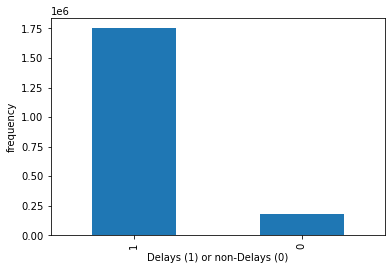

In [6]:
df.DelayedArr.value_counts().plot.bar()
plt.xlabel('Delays (1) or non-Delays (0)')
plt.ylabel('frequency')
plt.show()

As we can see figure [x] shows us that we have $1.75\cdot 10^6$ values in 1 (delay) while only $0.25\cdot 10^6$ values non delayed. After determing the train/test we can run SMOTE in order to generate synthetic samples for the test set to correct this imbalance.

Hence the imbalance exists, to do a correct split of train-test we will need to stratify when we apply the function train_test.

In [7]:
y = np.array(df.loc[:, df.columns == 'DelayedArr']).reshape(-1,1)

**Determinating X:**

This is the rest of the dataset, but we need to be careful since in our data set there are categorical data, which are numerical and object type, and numerical data mixed.

To do it right, we need to determine which is the categorical data and normalize them, the numerical data for instance we need to standarize it. Since, the transformation processes are asked in exercise 2. In this exercise we will keep the dataset together without transfomation, since the goal of this exercise it is to describe its outputs: train and test sets.

In [8]:
X = np.array(df.loc[:, df.columns != 'DelayedArr'])

**Train/tests sets:**

In [9]:
# obtain the train/test sets, we will be using 33% for test size and 67% for train size.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, 
                                                    random_state=42, shuffle=True, stratify=y)

In [10]:
# convert them to dataset another time to take a look:
df_train = pd.DataFrame(X_train, columns=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
                        'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 
                        'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
                        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay', 
                        'VelocityAir', 'TotalDelayed','TaxiTime'])
df_test = pd.DataFrame(X_test, columns=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
                        'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 
                        'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
                        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay',
                        'VelocityAir', 'TotalDelayed','TaxiTime'])
print('X train set:\n {}'.format(df_train.shape))
print('X test set:\n {}'.format(df_test.shape))

X train set:
 (1292006, 28)
X test set:
 (636362, 28)


In [11]:
# convert them to dataset for a better look:
dfy_train = pd.DataFrame(y_train, columns=['DelayedArr'])
dfy_test = pd.DataFrame(y_test, columns=['DelayedArr'])
print('y train set:\n {}'.format(dfy_train.shape))
print('y test set:\n {}'.format(dfy_test.shape))

y train set:
 (1292006, 1)
y test set:
 (636362, 1)


**Descriptive study of train/test:**

Next, we will explore what happen to our data when split in train and test.

In the case of the X_train and X_test, now are df_train and df_test. We can see that the data has become object, thus if we were to do further analysis we needed to convert these datasets accordingly to the integers, floats, strings we needed.

In [12]:
df_train.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum            object
TailNum              object
ActualElapsedTime    object
CRSElapsedTime       object
AirTime              object
ArrDelay             object
DepDelay             object
Origin               object
Dest                 object
Distance             object
TaxiIn               object
TaxiOut              object
CarrierDelay         object
WeatherDelay         object
NASDelay             object
SecurityDelay        object
LateAircraftDelay    object
VelocityAir          object
TotalDelayed         object
TaxiTime             object
dtype: object

We convert them as they should be with the function: infer_objects(), that will keep the string type as object and remap the integers and floats.

In [13]:
df_train = df_train.infer_objects()

In [14]:
df_train.describe(include='all')

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,TotalDelayed,TaxiTime
count,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1292006,1.292006e+06,1292006,...,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06,1.292006e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252287,NaN,653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.108210e+00,1.574861e+01,3.982870e+00,1.518507e+03,1.467527e+03,1.609934e+03,1.634155e+03,NaN,2.184106e+03,NaN,...,6.809667e+00,1.821115e+01,1.242352e+01,2.390576e+00,9.716206e+00,5.864214e-02,1.631428e+01,3.152325e+02,4.090323e+01,2.502081e+01
std,3.479913e+00,8.772582e+00,1.996372e+00,4.503810e+02,4.247961e+02,5.481638e+02,4.646958e+02,NaN,1.944058e+03,NaN,...,5.259659e+00,1.428989e+01,3.629008e+01,1.732223e+01,2.811594e+01,1.612806e+00,3.576943e+01,9.025317e+01,5.741673e+01,1.555465e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,1.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,6.110000e+02,NaN,...,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.554839e+02,0.000000e+00,1.600000e+01
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,1.544000e+03,NaN,...,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.221404e+02,2.400000e+01,2.100000e+01
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.015000e+03,NaN,3.421000e+03,NaN,...,8.000000e+00,2.100000e+01,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,3.802941e+02,5.600000e+01,2.900000e+01


In [15]:
df_train[['UniqueCarrier','TailNum','Origin','Dest']].describe(include='all')

,UniqueCarrier,TailNum,Origin,Dest
count,1292006,1292006,1292006,1292006
unique,20,5354,302,302
top,WN,N325SW,ATL,ORD
freq,252287,653,87996,72477


In [16]:
df_train.shape

(1292006, 28)

In [17]:
df_test = df_test.infer_objects()

In [18]:
df_test.describe(include='all')

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,TotalDelayed,TaxiTime
count,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362,636362.000000,636362,...,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000,636362.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N308SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123914,NaN,324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.107142,15.759070,3.989321,1518.932351,1468.104734,1610.865870,1634.279352,NaN,2184.670621,NaN,...,6.814877,18.229835,12.374729,2.406250,9.720675,0.057639,16.466832,315.216681,41.026123,25.044712
std,3.482467,8.784646,1.995394,450.546280,424.590769,547.670783,464.492782,NaN,1945.240972,NaN,...,5.285060,14.345861,36.029342,17.485301,28.198934,1.656809,36.226042,90.266570,57.576660,15.615867
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.946429,0.000000,1.000000
25%,3.000000,8.000000,2.000000,1203.000000,1135.000000,1316.000000,1325.000000,NaN,611.000000,NaN,...,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.584416,0.000000,16.000000
50%,6.000000,16.000000,4.000000,1546.000000,1510.000000,1716.000000,1705.000000,NaN,1542.000000,NaN,...,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,322.196532,25.000000,21.000000
75%,9.000000,23.000000,6.000000,1901.000000,1815.000000,2031.000000,2014.000000,NaN,3428.000000,NaN,...,8.000000,21.000000,10.000000,0.000000,6.000000,0.000000,18.000000,380.284698,56.000000,29.000000


In [19]:
df_test[['UniqueCarrier','TailNum','Origin','Dest']].describe(include='all')

,UniqueCarrier,TailNum,Origin,Dest
count,636362,636362,636362,636362
unique,20,5333,301,301
top,WN,N308SA,ATL,ORD
freq,123914,324,43217,35788


In [20]:
df_test.shape

(636362, 28)

Once converted, with the function describe we are able to extract simple statistics, that help us to unreavel the datasets.

In all numerical values (columns with integers and floats, like Month or DepTime or ArrTime) we can see that the means, standard deviation, maximum/minimum value and quantiles are the same. Meaning that the two datasets have same caracteristics, they are equivalents, so when we train our algorithm with the dataset df_train (or X_train, rather if we need to use the numpy array), we will be expecting that when we prove the algorithm to test datset the algorithm'll work well, and the avaluation will be as nearly precise as it is with the train set.

In the object values, occurs the same but for the for column TailNum, that it is the name of plane. In this case we have been expecting this, because the companies usually distribute their planes accordignly, and not by preference as it is in the case of the origins/destinations, or because they have "won" the right to make more flights as the case of the airlines (UniqueCarrier).

Now let's take a look at the y_train/test.

We can see, in the two figures below, that since our original data was imbalanced, there were more delays than airplanes arribing at time, the test dataset has the same caracteristic: imbalance of delays. This will cause problems when we train our algorithm, it will cause overfitting in the case of the train dataset, we will see that the algorithm when we get the scores in for example by using precision/recall, that it will be nearly 1. But the test will have an score very low.

To avoid this bad behaviour in the training and testing of the algorithm we will need to balance the number of delays/non-delays **before** spliting the dataset.

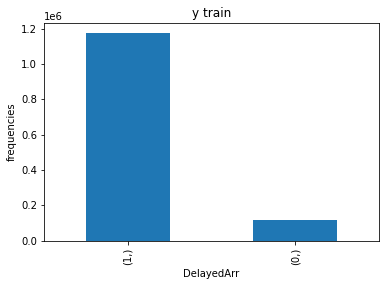

In [21]:
dfy_train.value_counts().plot.bar()
plt.title('y train')
plt.ylabel('frequencies')
plt.show()

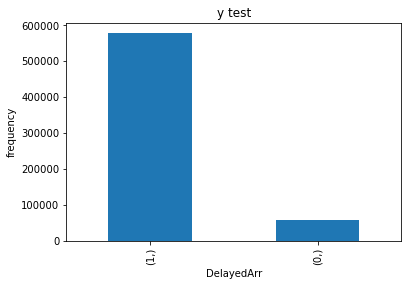

In [22]:
dfy_test.value_counts().plot.bar()
plt.title('y test')
plt.ylabel('frequency')
plt.show()

Summing it up, before doing the split of the dataset we need to apply transformations on it. To remap categorical data that may be in object values and needs to be normalized, standarize the numerical values, to balance the binary data needed to answer our question, etc.

# Nivell 2

## Exercici 2: Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Let's part from the original, cleaned, dataset delayedflights.csv:

In this exercise we will standanderizing, creating dummy columns (normalization), and using a polynomial transformation.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
 25  VelocityAir       

In [24]:
df.describe(include='all')

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed,TaxiTime
count,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1928368,1.928368e+06,1928368,...,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376201,NaN,961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.107858e+00,1.575206e+01,3.984999e+00,1.518648e+03,1.467717e+03,1.610242e+03,1.634196e+03,NaN,2.184292e+03,NaN,...,1.821731e+01,1.240742e+01,2.395748e+00,9.717681e+00,5.831097e-02,1.636462e+01,3.152273e+02,9.077375e-01,4.094378e+01,2.502870e+01
std,3.480755e+00,8.776564e+00,1.996051e+00,4.504355e+02,4.247283e+02,5.480012e+02,4.646287e+02,NaN,1.944448e+03,NaN,...,1.430838e+01,3.620424e+01,1.737621e+01,2.814335e+01,1.627458e+00,3.592082e+01,9.025757e+01,2.893962e-01,5.746957e+01,1.557488e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,6.110000e+02,NaN,...,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.555172e+02,1.000000e+00,0.000000e+00,1.600000e+01
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,1.543000e+03,NaN,...,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.221429e+02,1.000000e+00,2.400000e+01,2.100000e+01
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,3.423000e+03,NaN,...,2.100000e+01,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,3.802941e+02,1.000000e+00,5.600000e+01,2.900000e+01


First, let's split what is categorical data to what it is numerical data:

The columns UniqueCarrier, TailNum, Origin, Dest, are object type specifical and with more or less unique values, which makes them categorical columns. Others that are categorical are Month, DayofMonth, DayOfWeek, FlightNum, and, DelayedArr.

In [25]:
print('Number of months: {}'.format(df.Month.nunique()))
print('Number of day: {}'.format(df.DayofMonth.nunique()))
print('Number of day of week: {}'.format(df.DayOfWeek.nunique()))
print('Number of Airlines: {}'.format(df.UniqueCarrier.nunique()))
print('Number of Tail numbers: {}'.format(df.TailNum.nunique()))
print('Number of Origins: {}'.format(df.Origin.nunique()))
print('Number of Destinations: {}'.format(df.Dest.nunique()))
print('Number of Flight number: {}'.format(df.FlightNum.nunique()))
print('Number of DelayedArr: {}'.format(df.DelayedArr.nunique()))

Number of months: 12
Number of day: 31
Number of day of week: 7
Number of Airlines: 20
Number of Tail numbers: 5360
Number of Origins: 303
Number of Destinations: 302
Number of Flight number: 7498
Number of DelayedArr: 2


In [26]:
# we already store the y column:
y = np.array(df.loc[:, df.columns == 'DelayedArr']).reshape(-1,1)

Now that we have declared which are our categorical variables, we will begin the transformations. Frist, we will take the numerical values, that are not: Month, day, day of the week, carrier, flight number, tail number, and origin/destination; and do standarize them.

In [27]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'VelocityAir', 'DelayedArr', 'TotalDelayed',
       'TaxiTime'],
      dtype='object')

In [28]:
# subdataset of numerical values:
dfnum = df[['DepTime', 'CRSDepTime', 'ArrTime','CRSArrTime','ActualElapsedTime', 'CRSElapsedTime', 
            'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
            'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'VelocityAir', 'TotalDelayed',
            'TaxiTime']]

In [29]:
# standarization:
X = np.array(dfnum)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
dfsca = pd.DataFrame(X_scaled, columns=['DepTime', 'CRSDepTime', 'ArrTime','CRSArrTime','ActualElapsedTime', 
                                        'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 
                                        'TaxiIn', 'TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 
                                        'SecurityDelay', 'LateAircraftDelay', 'VelocityAir', 'TotalDelayed',
                                        'TaxiTime'])
dfsca.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,TotalDelayed,TaxiTime
0,1.075298,1.147281,1.096272,1.271562,-0.073631,0.221838,0.112507,-0.989704,-0.658802,0.078502,-0.533667,-0.714079,-0.342706,-0.137875,-0.345292,-0.035829,-0.455575,0.714181,-0.712443,-0.836520
1,-1.697574,-1.725144,-1.109928,-1.364953,-0.073631,0.151646,0.068803,-0.707936,-0.452291,0.078502,-0.343844,-0.574301,-0.342706,-0.137875,-0.345292,-0.035829,-0.455575,0.714181,-0.712443,-0.643902
2,-1.977304,-1.995906,-1.471241,-1.903017,-0.517705,-0.620463,-0.470221,-0.496611,-0.658802,-0.435538,-0.723491,-0.085077,-0.342706,-0.137875,-0.345292,-0.035829,-0.455575,0.073653,-0.712443,-0.322873
3,0.689005,0.676391,0.636419,0.625885,-0.600969,-0.620463,-0.455653,-0.144402,-0.170684,-0.435538,-0.723491,-0.574301,-0.287464,-0.137875,-0.345292,-0.035829,0.435273,0.311398,-0.120825,-0.772314
4,0.935434,1.053103,0.932039,1.024052,-0.448319,-0.269504,-0.309971,-0.549442,-0.339648,-0.134084,-0.533667,-0.574301,-0.342706,-0.137875,-0.345292,-0.035829,-0.455575,1.035765,-0.712443,-0.708108


Now we put in together the categorical values:

In [31]:
# subdataset of categorical features.
dfcat = df[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum',
            'Origin', 'Dest']]

We will normalize the numerical-categorical values: month, day, day of week, and, FlightNum with MinMaxScaler, also we will not take into account the column TailNum (number/name of airplane), since doesn't apport extra information in the dataset and as we have seen in nunique() this single column creates around 7500 new columns, which will kill our kernel if we try to run it.

We need to understand, that before normalizing all the dataset, we need to be clear in what analysis we want to on it. For this, it is recomendable to purge all the columns that doesn't apport any information on the analysis or are redundant. This has not been applied in this case since were are only understanding how to use the functions.

In [32]:
Xcat1 = np.array(dfcat[['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']])
scaler1 = MinMaxScaler()
Xcat1_scaled = scaler1.fit_transform(Xcat1)

In [33]:
dfcat1 = pd.DataFrame(Xcat1_scaled, columns=['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum'])
dfcat1.head()

,Month,DayofMonth,DayOfWeek,FlightNum
0,0.0,0.066667,0.5,0.034292
1,0.0,0.066667,0.5,0.331622
2,0.0,0.066667,0.5,0.045893
3,0.0,0.066667,0.5,0.402361
4,0.0,0.066667,0.5,0.038706


For the categorical object values we will be using get_dummies to normalize:

In [34]:
# Next we will be using get_dummies to normalize UniqueCarrier, Origin and destination.
dfcat2 = pd.get_dummies(dfcat, columns=['UniqueCarrier', 'Origin', 'Dest'], drop_first = True)
dfcat2.drop(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'TailNum'], axis=1, inplace = True)

In [35]:
dfcat2.head()

,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that creating dummies on these columns makes up to 622 new columns (UC= 20 + Or=303 + Dest=302), if we try to concatenate this dataset to the normalized one it will provoke to kill the kernel, for this we need to do further transformation on this set to reduce the number of columns.

This also could have been applyed to Month, Day and name of the day. I have choosen to use, instead, the normalization since they were numerical values. Also, a better way to extract the information from Origin/Destination, since they have around 300 variables would be to use some function to remap each string value into numerical value and then apply normalization.

One last step, would be concatenate the normalized columns of dfcat1 with dfcat2 and afterwards concatante it with the numerical part of the dataset, dfnum. I will not do it, because dfcat2 has created 600 new columns, adding them to the whole data set sometimes kills the kernel, because of the large size. Thus, if we were not doing it as test on the exercise, I would recommend to use get_dummies for categorical values with low number of unique values as can be the Month, day, day of the week, unique carrier.

Then again, once the dataset is complete, standarized and normalized, we could split it in train test, with the function split_train_test(), and proceed to further analysis.

In [36]:
# concatenate categorical:
#dfcatnor = pd.concat([dfcat1, dfcat2],axis=0)

# concatenate numerical:
#dfnor = pd.concat([dfnum, dfcatnor], axis=0)
#dfnor

# use split_train_test train a model (X2 doesn't need further transformation i.e., scaling, since has been proper 
# tranformed before).
# X2 = np.array(dfnor)
# y = has been declared in exercise 1.
#X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=0.33, 
#                                                    random_state=42, shuffle=True, stratify=y)

**Polynomial transformation**

A polynomial transformation is done before to calculate a linerar or non-linear regression, named Mulitivared linear regression. Defined as:

$$\theta = \theta_{0} + \theta_{1} x_1 + \theta_2 x_2 + ... = \theta_0 + \sum_{j=1}^{N} \theta_j x_j$$

where $\theta_i$ are given by the minimization of the data and $x_i$ are each of the features in our set.

This function, polynomial tranformation, is useful if we want to use a splines model, instead, or any model that polynomial expansion is needed.

In function polynomial features the degree option allows to determine which type of regression we choose. If we choose degree 2, we will then fit a linear regression, which of course we will use at least two columns of the dataset. For more complex behaviours, non-linear regressions will be required, thus we will increase the degree to 3, 4 or even 5. We need to be careful, then to increase the degree since we may fall on the trick of overfitting the dataset.

Since it is only an example we will using all numerical values we will be using all features that dfnum (array X), defined before.

If we wanted to do an analysis between two features, then later we could be use LinearRegression to study the dependence, or if we want to use part of the dataset or all, we could use Gradient Descend or the Normal Equation to see the values that minimize better our system.

In [37]:
dfnum.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'VelocityAir', 'TotalDelayed',
       'TaxiTime'],
      dtype='object')

In [38]:
# we choose all numerical values X array defined before (not scaled!).
# in this exercise we do the suposition that all our data is related in a linear way, there are no non-linearities.
poly = PolynomialFeatures(degree = 2, interaction_only = True)
poly.fit(X)
X_polycat = poly.transform(X)

In [39]:
X_polycat.shape

(1928368, 211)

In [40]:
# typical linear regression with two features (TotalDelayed with WeatherDelay and CarrierDelay):
dfk = dfnum[['WeatherDelay', 'CarrierDelay']]
X2 = np.array(dfk)
y2 = np.array(dfnum['TotalDelayed']).reshape(-1,1)

#split the dataset, since it is to big to train the linear regression. We take the 50% for training because less
# than that crushes the kernel.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.5, 
                                                    random_state=42, shuffle=True, stratify=y)

# train our model:
poly2 = PolynomialFeatures(degree = 2, interaction_only = True)
poly2.fit(X2_train)
X2_poly = poly2.transform(X2_train)

In [41]:
X2_poly.shape

(964184, 4)

In [42]:
pmodel = LinearRegression()
pmodel.fit(X2_poly, y2_train)
y_pred = pmodel.predict(X2_poly)
y_pred

array([[184.73432303],
       [ 27.50464755],
       [ 27.50464755],
       ...,
       [ 61.2601711 ],
       [ 27.50464755],
       [ 40.82919632]])

Since TotalDelayed is function of CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay, another example would have been using all this features to determine the multivariate regression that fits best.

In [43]:
# As per curiosity, we will compute the Normal Equation to see which values minimize all our system 
# (aka our X array)
# Now let's get the normal equation: theta = ((Xtrans * X)^-1)* Xtrans * y  (remember that they are dot products!)
# get the transpose:
xtrans = np.transpose(X)
# get the products:
theta1 = xtrans.dot(X)
theta2 = xtrans.dot(y)
# together:
theta = theta1.dot(theta2)
# Values that mimize all features on our system:
theta

array([[5.69290541e+22],
       [5.48687053e+22],
       [6.04034539e+22],
       [6.12605630e+22],
       [4.80767510e+21],
       [4.84467788e+21],
       [3.91845868e+21],
       [1.50875378e+21],
       [1.54575646e+21],
       [2.78113117e+22],
       [2.41488766e+20],
       [6.47727652e+20],
       [4.20528181e+20],
       [8.34948724e+19],
       [3.49964802e+20],
       [1.92720353e+18],
       [6.10569205e+20],
       [1.12448301e+22],
       [1.46648426e+21],
       [8.89216417e+20]])

# Nivell 3

## Exercici 3: Resumeix les noves columnes generades de manera estadística i gràfica

Instead of plotting a regression graph, and do some regression analysis, in this exercise we will plot the graph that form our dataset.

The dataset choosen is dfnum, since it is the numerical part of our dataset. To plot out the graph, we will compute the correlation matrix, threshold it over the standard deviation of each feature and not take into account the self-loops ( example: DepTime vs DepTime instead of 1 will be 0). Afterwards we will plot the resultant graph.

In [44]:
# plot network (using only dfnum or X_scaled (dfsca), the network resultant it is the same)
import networkx as nx

# 1. get adjacency matrix
corrdf = dfnum.corr()
corrdfas = abs(corrdf)

# 2. Use a threshold to only keep the strongest links:
thres = corrdfas.std()
net = corrdf[(corrdf >= thres) & (corrdf != 1) ] # we don't want self links.
net[np.isnan(net)] = 0
net2 = np.array(net)

# Relabel nodes:
mapping = dict(zip(G, dfnum.columns.to_list())) # if we want to insert the column name.

# 3. Map the network
G = nx.from_numpy_matrix(net2)

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)
plt.show()

NameError: name 'G' is not defined

Since the names of the nodes are the names of the columns and they can be quite long thus I will be using only numbers, see below to avoid confusions.

As we can see there are 2 different networks and a node that not belongs to any of them, thus independent of the system. Node 15, the indepedent one, it is SecurityDelay, means that the delays caused by this variable are not dependent of the depeature/arrival times (nodes = 0,1,2,3), the flight times, taxi or other delays.

Nodes 0,1,2,3 form a small network, thus indicating that the depature/arrival time (either real or CRS) are linked each other and not of the other features. Indicating that when flight is delayed, instead of looking at DepTime/ArrTime, we should focus at ArrDelay/DepDelay that are on the network of the types of delays and air flights, between others.

So, the last network, the largest one, links together the rest of features. Thus meaning that the airplane delays are a co-joined cause of: Time on the air (4,5,6), delay on arrival/departure (7,8), distance and velocity (9, 17), time the plane takes to drive to the "landing line" (10,11, 19) and delays specifics (12, 13, 14, 15, 18).


If we wanted to do trainning in some model, i.e. Multivariate Linear regression, to predict the delays on this system the nodes/features we would need to pick are the 4 to 18, leaving out 15, to have a well behaved prediction.

To remember the columns of the dfnum:

In [ ]:
 dict(zip(G, dfnum.columns.to_list()))

This library, networkx, also accepts networks for categorical values, if in our dataset we had some categorical values that might have been correlated/linked between them we could also apply this library to plot its graph.